# 統計的機械学習特論

## 課題２

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### データセット読み込み

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### データの可視化

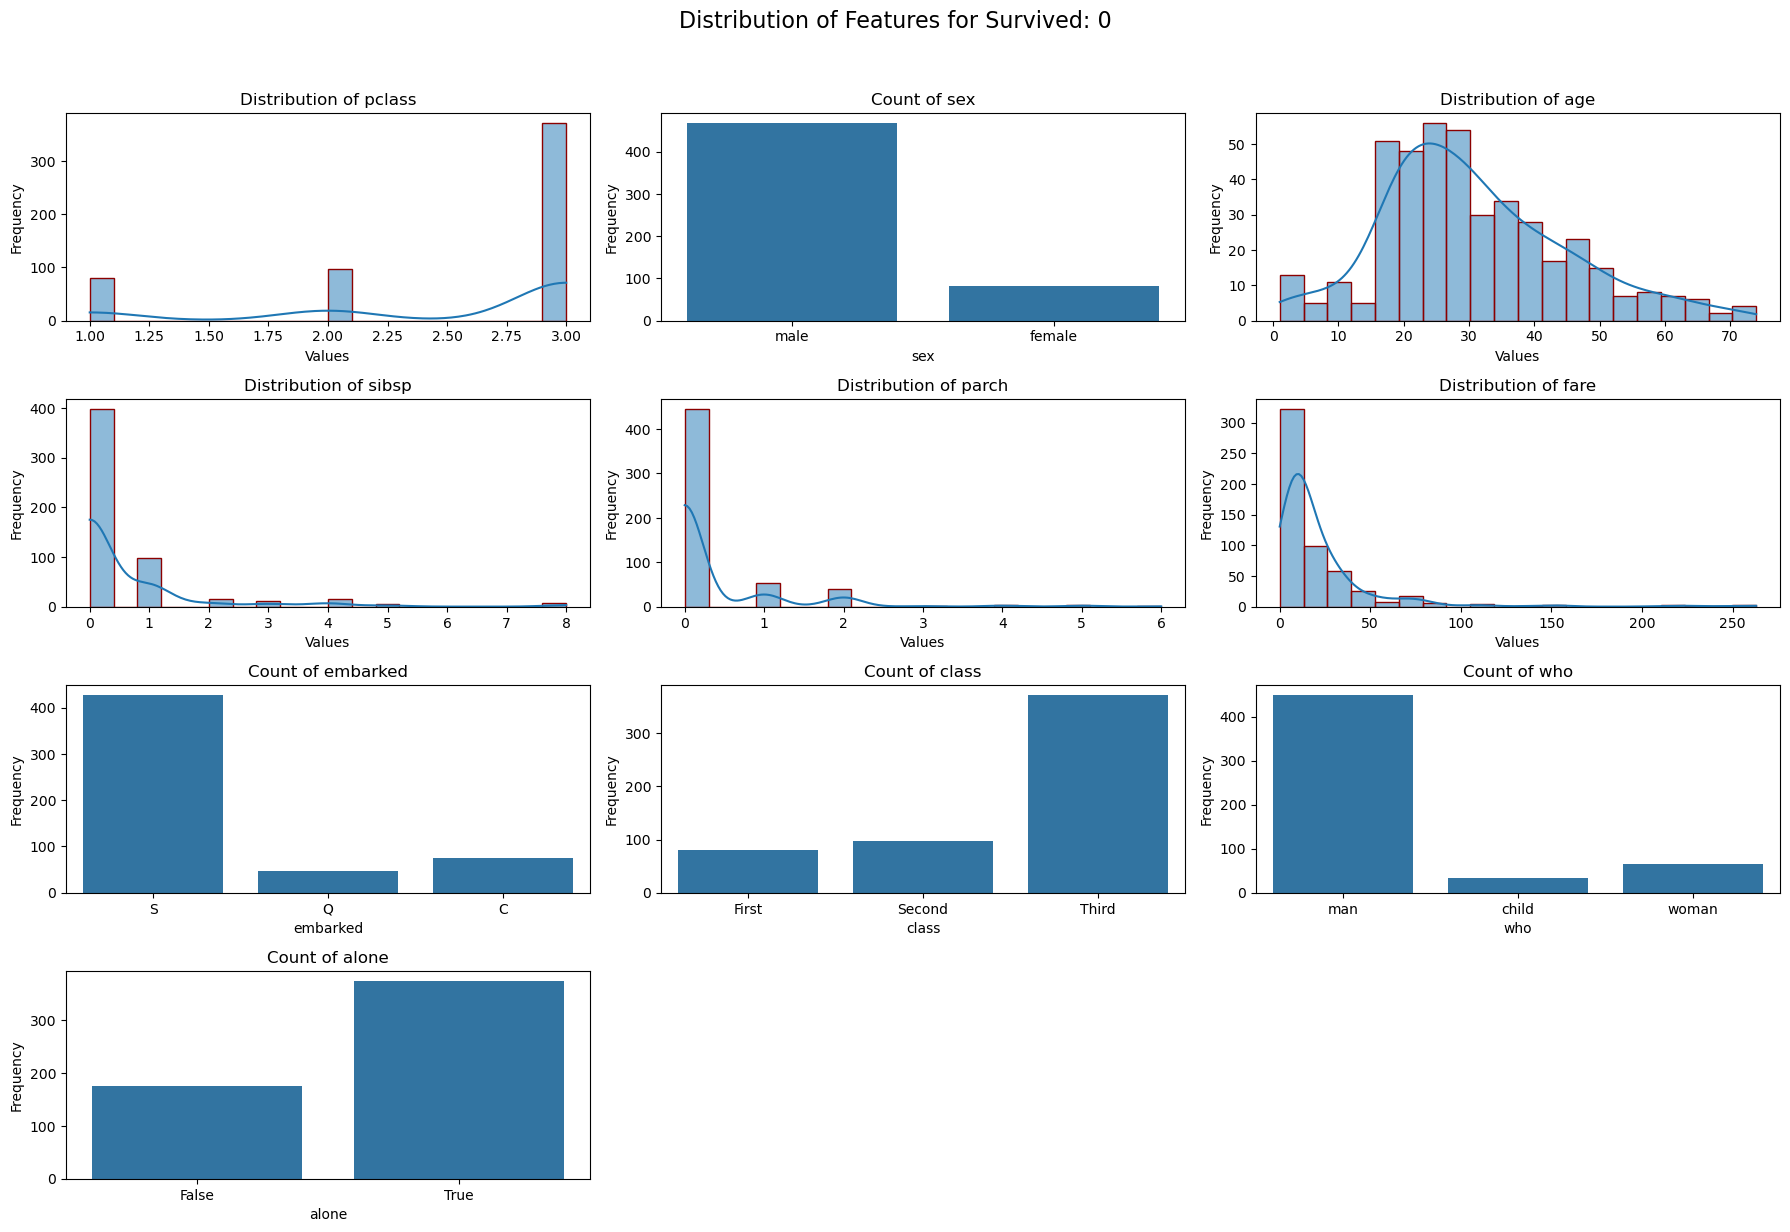

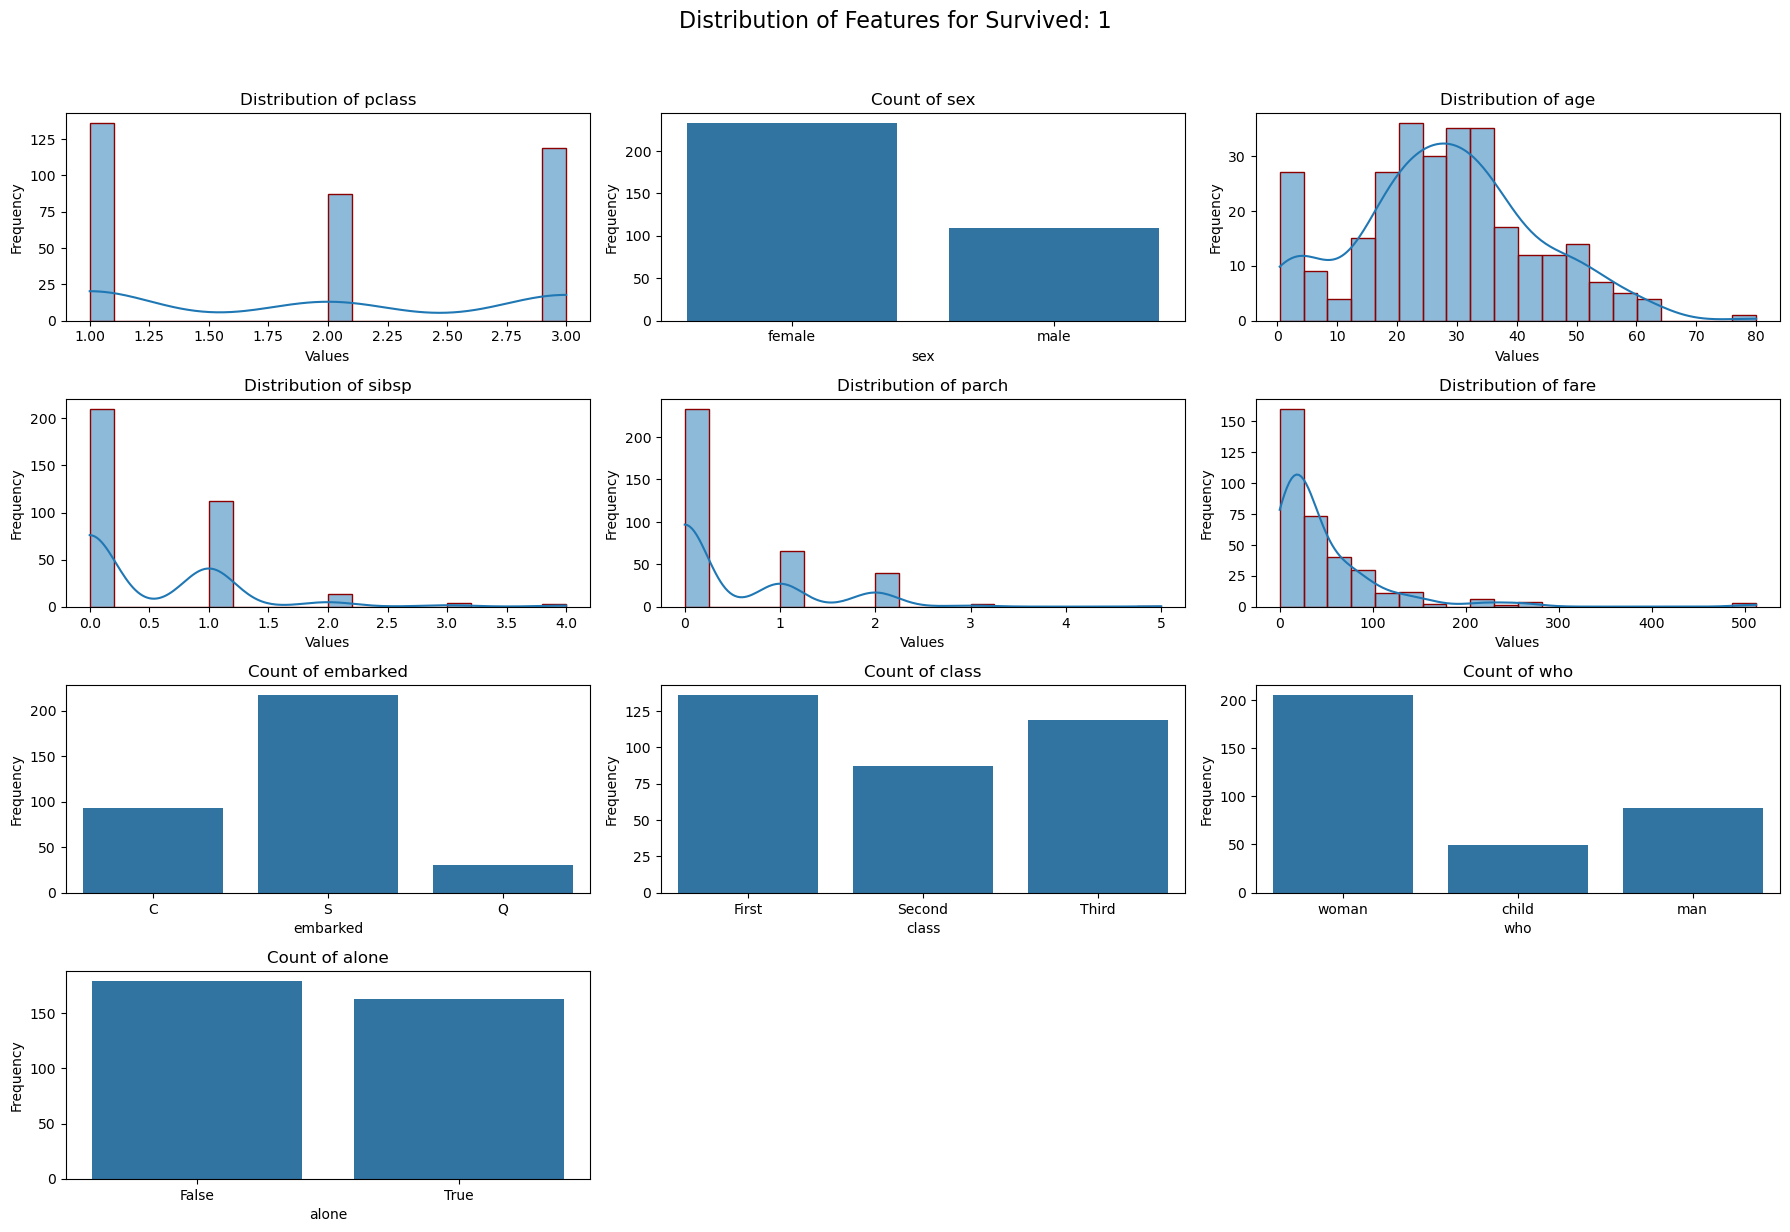

In [6]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'alone']

for survived_value in df['survived'].unique():
    plt.figure(figsize=(18, 15))  
    plt.suptitle(f'Distribution of Features for Survived: {survived_value}', fontsize=16)

    filtered_df = df[df['survived'] == survived_value]  

    for index, feature in enumerate(features):
        plt.subplot(5, 3, index + 1) 
        if filtered_df[feature].dtype in ['int64', 'float64']: 
            sns.histplot(filtered_df[feature], bins=20, kde=True,edgecolor='darkred')
            plt.title(f'Distribution of {feature}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
        else:  # カテゴリカルデータの場合
            sns.countplot(data=filtered_df, x=feature)
            plt.title(f'Count of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

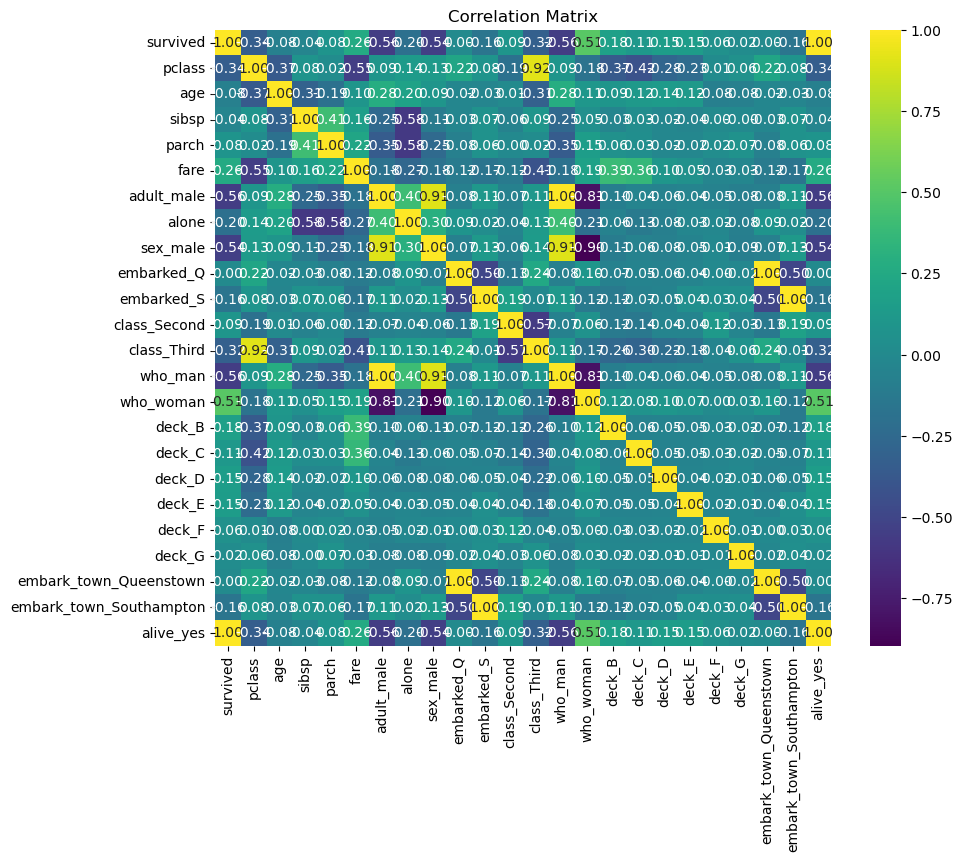

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True, fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has be

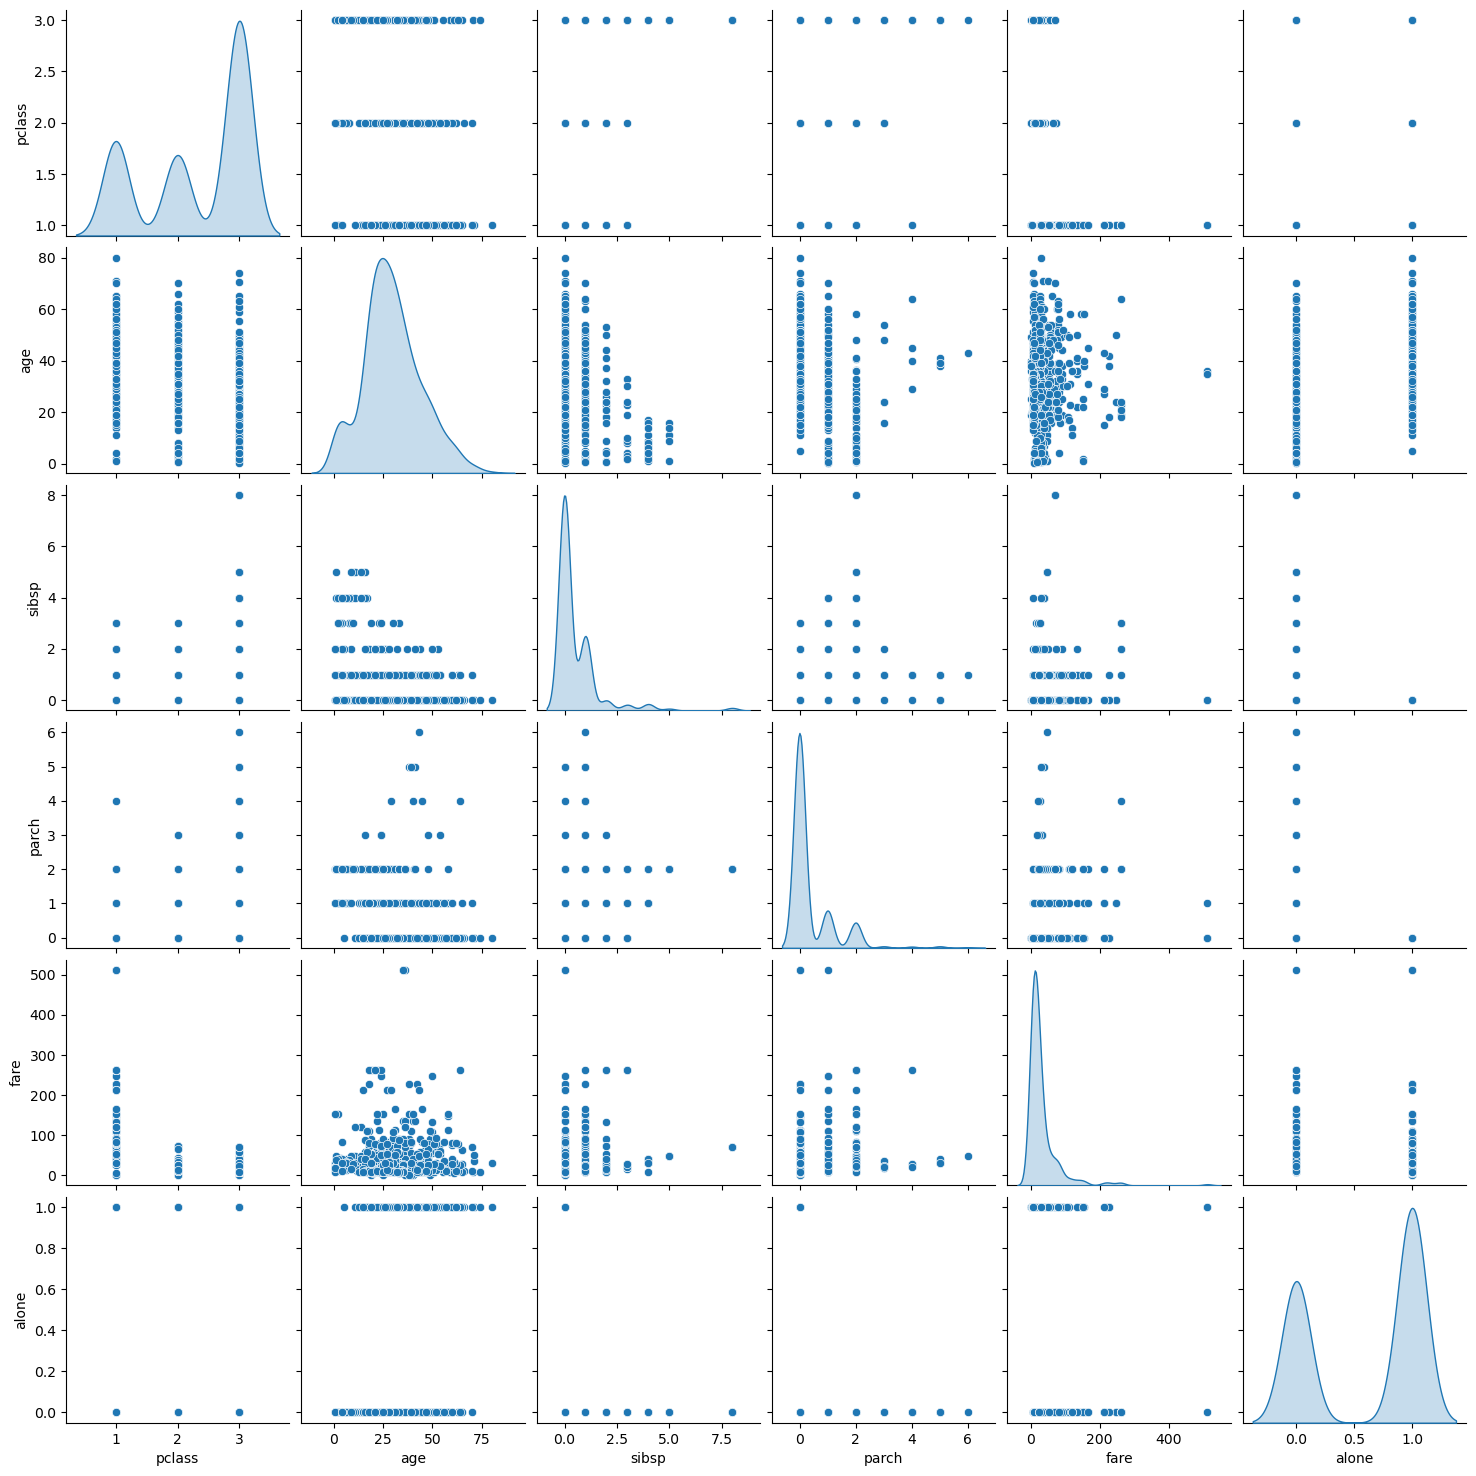

In [8]:
sns.pairplot(df[features], diag_kind='kde', palette='muted')

### データセットの準備

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time

#前処理
df = df.drop(['adult_male','deck','embark_town','alive'], axis=1)
df = df.dropna()  
df = df.fillna({'sex': df['sex'].mode()[0], 'embarked': df['embarked'].mode()[0], 'class': df['class'].mode()[0], 'who': df['who'].mode()[0]})
df['pclass'] = df['pclass'].astype(int)
df['age'] = df['age'].astype(int)
df['sibsp'] = df['sibsp'].astype(int)
df['parch'] = df['parch'].astype(int)
df['alone'] = df['alone'].astype(int)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who'], dtype=int)

data_features = df.drop(columns=["survived"])
target_variable = df["survived"]

scaler = StandardScaler()
numerical_cols = data_features.select_dtypes(include=['number']).columns
data_features[numerical_cols] = scaler.fit_transform(data_features[numerical_cols])

train_features, test_features, train_target, test_target = train_test_split(
    data_features,
    target_variable,
    test_size=0.3,
    random_state=int(time.time())
)

print("train_features.shape:", train_features.shape)
print("test_features.shape:", test_features.shape)
print("train_target.shape:", train_target.shape)
print("test_target.shape:", test_target.shape)

train_features.shape: (498, 17)
test_features.shape: (214, 17)
train_target.shape: (498,)
test_target.shape: (214,)


In [10]:
train_features.info()
train_features.head()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 719 to 714
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        498 non-null    float64
 1   age           498 non-null    float64
 2   sibsp         498 non-null    float64
 3   parch         498 non-null    float64
 4   fare          498 non-null    float64
 5   alone         498 non-null    float64
 6   sex_female    498 non-null    float64
 7   sex_male      498 non-null    float64
 8   embarked_C    498 non-null    float64
 9   embarked_Q    498 non-null    float64
 10  embarked_S    498 non-null    float64
 11  class_First   498 non-null    float64
 12  class_Second  498 non-null    float64
 13  class_Third   498 non-null    float64
 14  who_child     498 non-null    float64
 15  who_man       498 non-null    float64
 16  who_woman     498 non-null    float64
dtypes: float64(17)
memory usage: 70.0 KB


,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman
719,0.908600,0.233070,-0.552714,-0.506787,-0.506456,0.878148,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,-0.566538,1.002813,-0.363257,0.850865,-0.659912
869,0.908600,-1.767937,0.522511,0.664747,-0.442974,-1.138760,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,-0.566538,1.002813,2.752874,-1.175275,-0.659912
562,-0.287191,-0.111932,-0.552714,-0.506787,-0.398236,0.878148,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,1.765108,-0.997195,-0.363257,0.850865,-0.659912
319,-1.482983,0.716071,0.522511,0.664747,1.889036,-1.138760,1.322511,-1.322511,2.115874,-0.202326,-1.872519,1.693979,-0.566538,-0.997195,-0.363257,-1.175275,1.515354
553,0.908600,-0.525933,-0.552714,-0.506787,-0.516853,0.878148,-0.756138,0.756138,2.115874,-0.202326,-1.872519,-0.590326,-0.566538,1.002813,-0.363257,0.850865,-0.659912


Logistic Regressionの結果:
Logistic Regressionの特徴量重要度:


/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 12398 (\N{HIRAGANA LETT

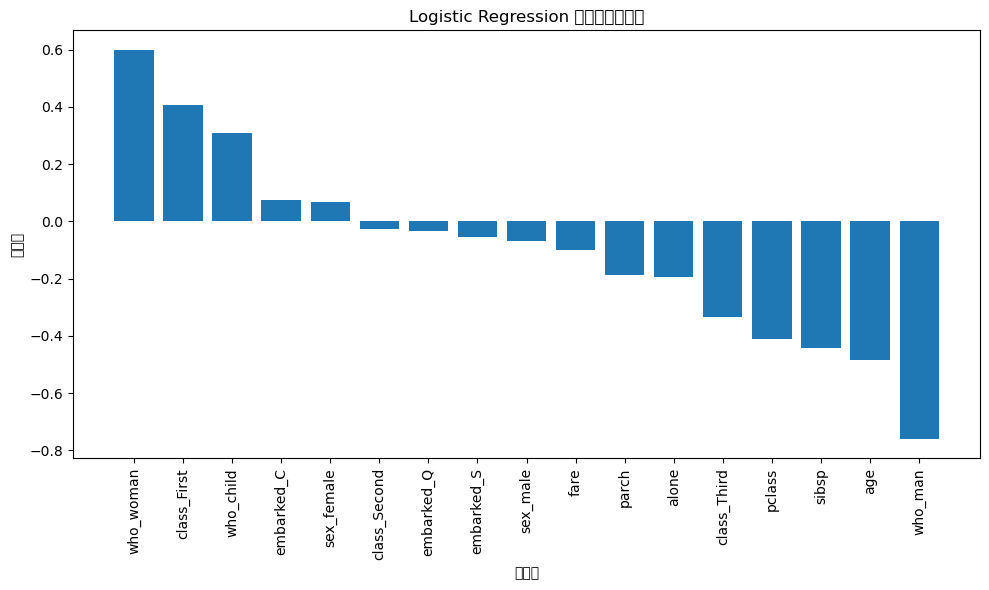

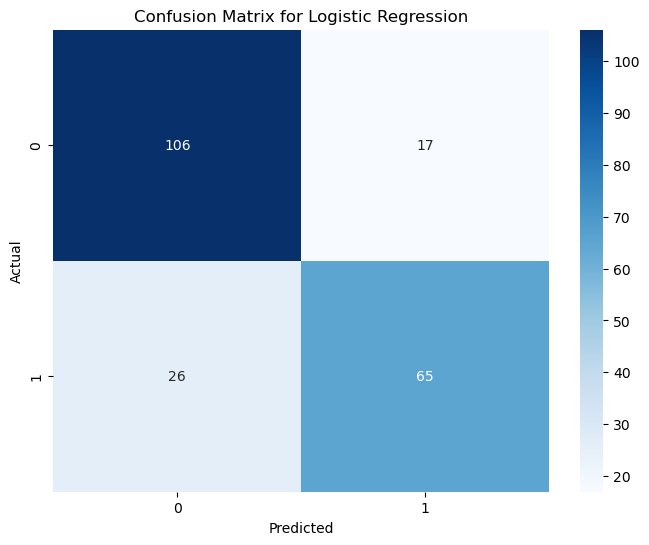



LDAの結果:
LDAの特徴量重要度:


/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1876215/394620602.py:37: UserWarning: Glyph 12398 (\N{HIRAGANA LETT

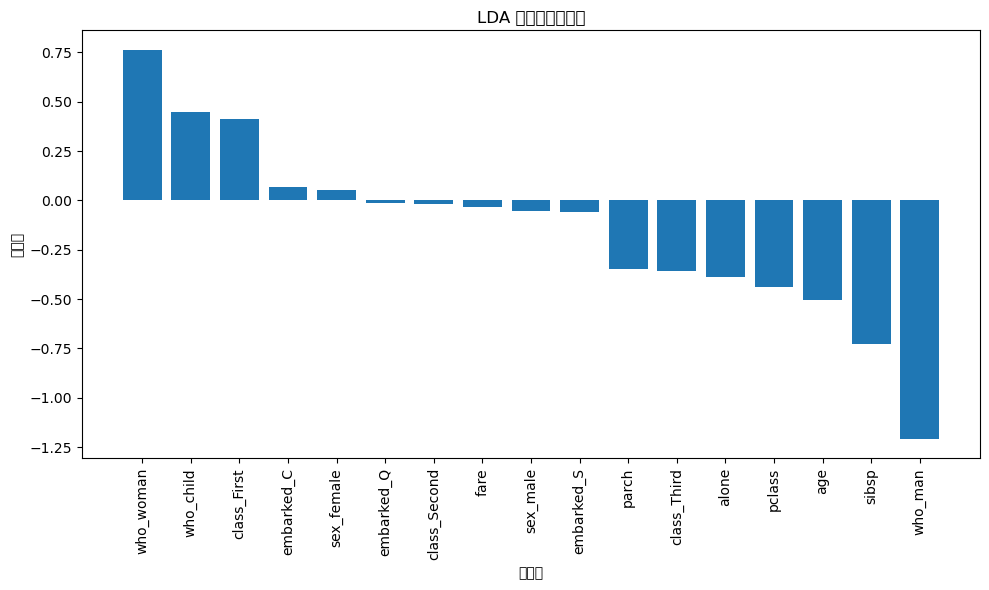

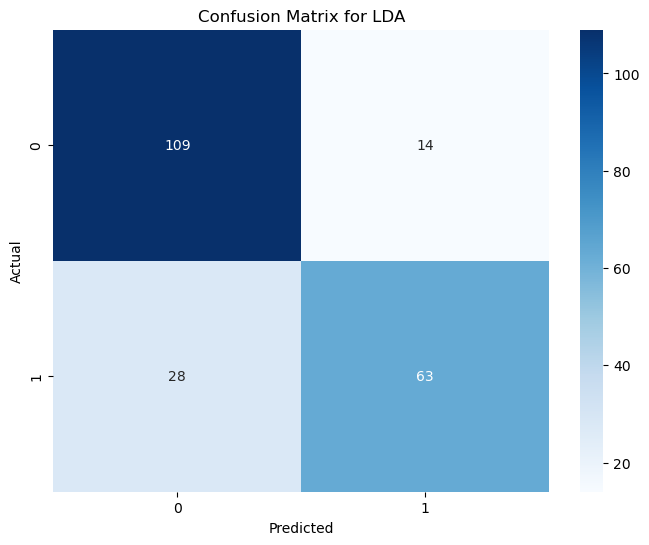



QDAの結果:
QDAの特徴量重要度:
このモデルには回帰係数または特徴量重要度がありません。


/home/li-lab-negoya/anaconda3/envs/static-ml/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


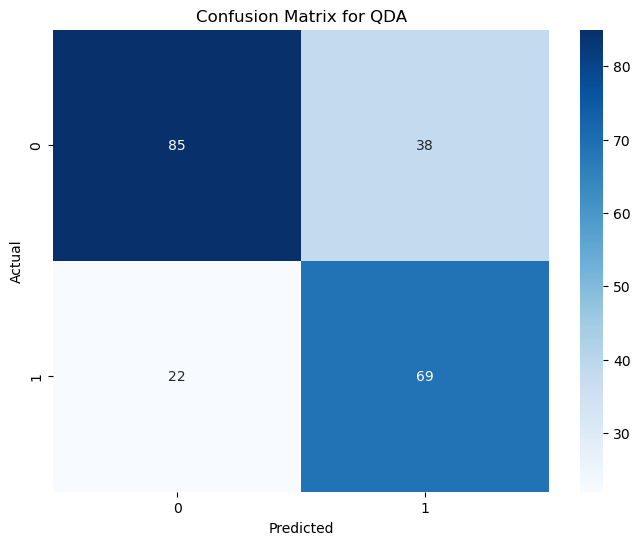



Naive Bayesの結果:
Naive Bayesの特徴量重要度:
このモデルには回帰係数または特徴量重要度がありません。


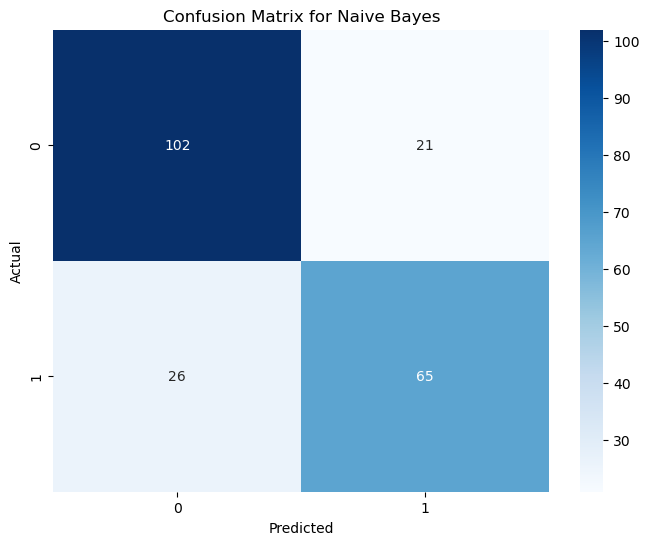



1-NNの結果:
1-NNの特徴量重要度:
このモデルには回帰係数または特徴量重要度がありません。


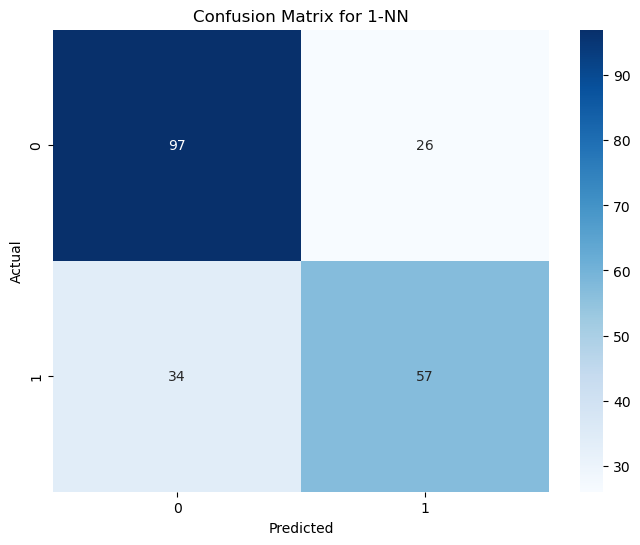

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "1-NN": KNeighborsClassifier(n_neighbors=1)  
}

for model_name, model in models.items():
    model.fit(train_features, train_target)
    predicted = model.predict(test_features)
    
    print(f"{model_name}の結果:")
    report = classification_report(test_target, predicted, output_dict=True)
    accuracy = report['accuracy']
    with open('accuracy_results.csv', 'a') as f:
        f.write(f"{model_name},{accuracy}\n")
    
    print(f"{model_name}の特徴量重要度:")
    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
        feature_names = train_features.columns
        importance_df = pd.DataFrame({'特徴量': feature_names, '重要度': coef})
        importance_df = importance_df.sort_values(by='重要度', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['特徴量'], importance_df['重要度'])
        plt.xticks(rotation=90)
        plt.xlabel('特徴量')
        plt.ylabel('重要度')
        plt.title(f'{model_name} の特徴量重要度')
        plt.tight_layout()
        plt.show()

    elif hasattr(model, 'feature_importances_'):
        feature_names = train_features.columns
        importance_df = pd.DataFrame({'特徴量': feature_names, '重要度': model.feature_importances_})
        importance_df = importance_df.sort_values(by='重要度', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['特徴量'], importance_df['重要度'])
        plt.xticks(rotation=90)
        plt.xlabel('特徴量')
        plt.ylabel('重要度')
        plt.title(f'{model_name} の特徴量重要度')
        plt.tight_layout()
        plt.show()
    else:
        print("このモデルには回帰係数または特徴量重要度がありません。")

    
    # 混同行列の作成
    cm = confusion_matrix(test_target, predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    print("\n" + "="*50 + "\n")

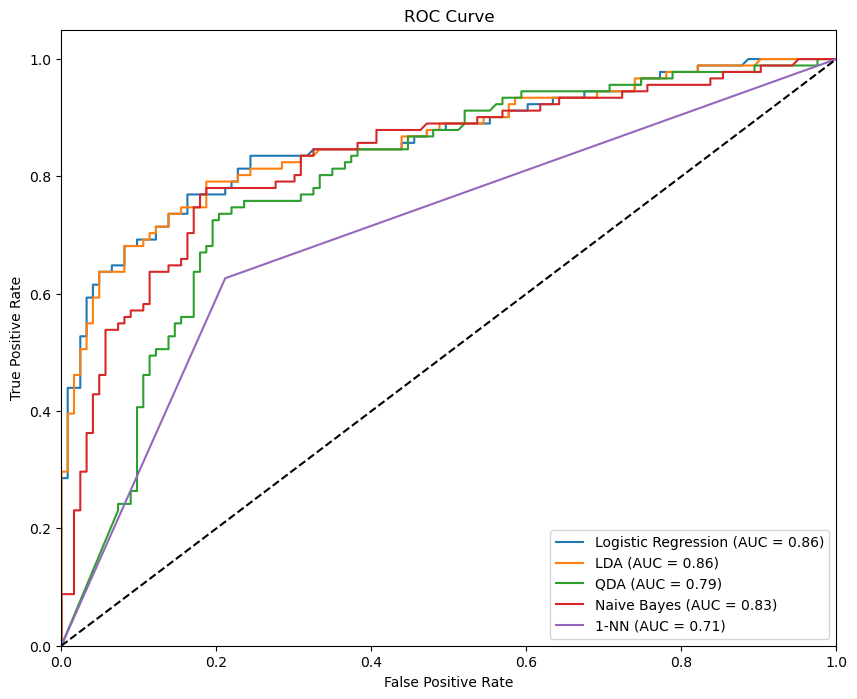

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_prob = model.predict_proba(test_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_target, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # 対角線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



ポアソン回帰モデルの評価:
平均二乗誤差 (MSE): 0.16889109583186065
R^2 スコア: 0.3089844880982855


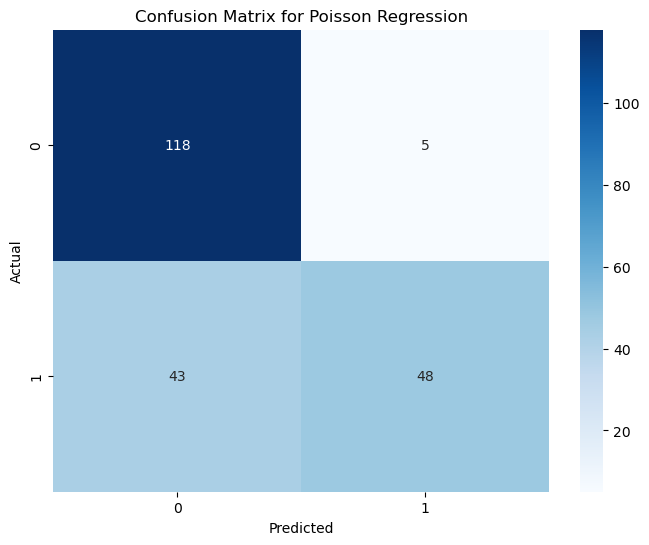

## 課題3 ポアソン回帰

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

url = 'https://raw.githubusercontent.com/okeefj22/CA4010-data-project/master/datasets/student-por.csv'

df = pd.read_csv(url) 
X = df[['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'romantic', 'famrel', 'freetime', 'goout', 'health']]
y = df['absences']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = PoissonRegressor(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

importance = np.abs(model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("各特徴量の重要度:")
print(feature_importance)

Mean Squared Error: 19.79956249762318
各特徴量の重要度:
         Feature  Importance
4      studytime    0.115798
0            age    0.112903
6         famrel    0.105050
11  romantic_yes    0.103082
3     traveltime    0.086803
5       failures    0.065259
8          goout    0.054038
10         sex_M    0.050821
2           Fedu    0.048321
9         health    0.034203
1           Medu    0.010517
7       freetime    0.003104
